### Medical Data Analysis

In this freecodecamp project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. 
The dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("medical_examination.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


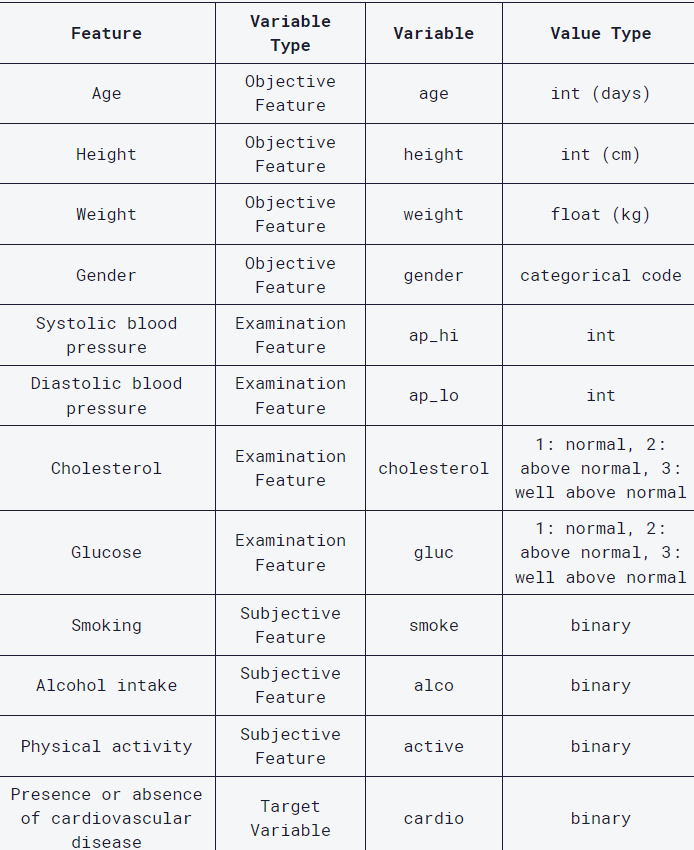

#### **Question 1**

Create a bar chart where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

<function matplotlib.pyplot.show>

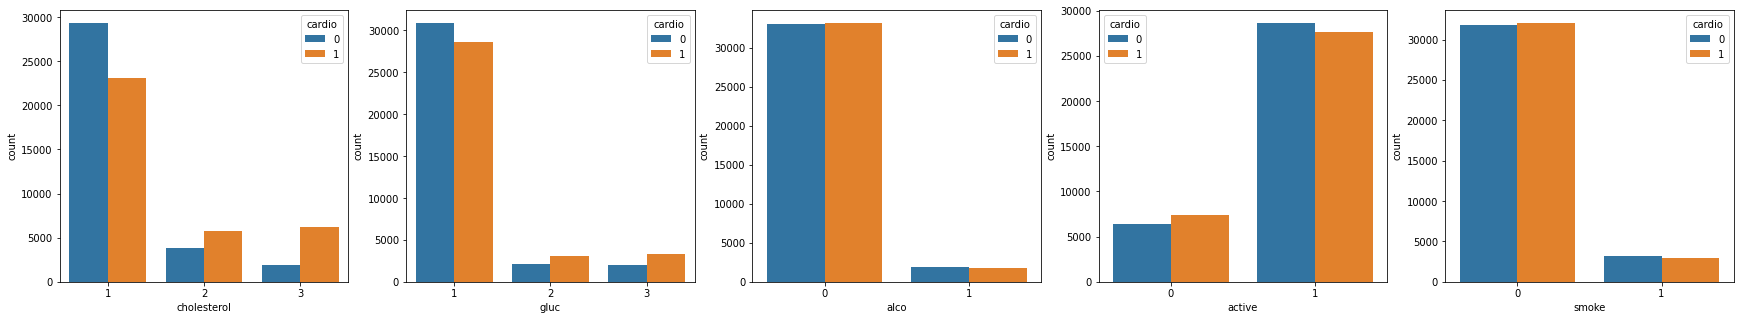

In [ ]:
fig, axs = plt.subplots(ncols=5,figsize=(30,5))
sb.countplot(x='cholesterol',data=df,hue='cardio',ax=axs[0])
sb.countplot(x='gluc',data=df,hue='cardio',ax=axs[1])
sb.countplot(x='alco',data=df,hue='cardio',ax=axs[2])
sb.countplot(x='active',data=df,hue='cardio',ax=axs[3])
sb.countplot(x='smoke',data=df,hue='cardio',ax=axs[4])
plt.show

#### **Question 2**

Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [ ]:
#convert height from cm to m
df['height']=df['height'].astype("float")
df['height']=df['height'].apply(lambda x : x*0.01)

In [ ]:
# adding a new column to calculate BMI
df['BMI'] = df['weight'] / df['height']
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,36.904762
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,54.487179
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,38.787879
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,48.520710
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,35.897436


In [ ]:
# adding an overweight column
df['Overweight'] = 0

# example_df.loc[example_df["column_name1"] condition, "column_name2"] = value
df.loc[df["BMI"] >25 , "Overweight"] = 1
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,36.904762,1
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,54.487179,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,38.787879,1
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,48.520710,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,35.897436,1


#### **Question 3**

Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [ ]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [ ]:
df['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

Normalization - 

In [ ]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] >=2 , 'cholesterol'] = 1

In [ ]:
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] >=2 , 'gluc'] = 1

After normalization - 

In [ ]:
df['cholesterol'].value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [ ]:
df['gluc'].value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,36.904762,1
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,54.487179,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,38.787879,1
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,48.520710,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,35.897436,1


#### **Question 4**

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like bar chart.

In [ ]:
df1 = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'Overweight', 'smoke'])
df1.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


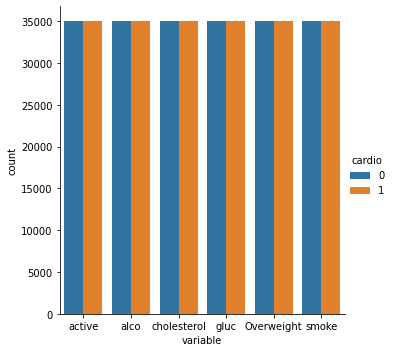

In [ ]:
sb.catplot(x='variable',hue='cardio', data=df1, kind='count')

#### **Question 5**

Clean the data. Filter out the following patient segments that represent incorrect data:
1. diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
2. height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
3. height is more than the 97.5th percentile
4. weight is less than the 2.5th percentile
5. weight is more than the 97.5th percentile

In [ ]:
df.shape

(70000, 15)

In [ ]:
# diastolic pressure is higher than systolic
df = df.loc[df['ap_lo'] <= df['ap_hi']]
df.shape

(68766, 15)

In [ ]:
# height is less than the 2.5th percentile
df = df.loc[df['height'] >= df['height'].quantile(0.025)]
df.shape

(67260, 15)

In [ ]:
# height is more than the 97.5th percentile
df = df.loc[df['height'] <= df['height'].quantile(0.975)]
df.shape

(65859, 15)

In [ ]:
# weight is less than the 2.5th percentile
df = df.loc[df['weight'] >= df['weight'].quantile(0.025)]
df.shape

(64384, 15)

In [ ]:
# weight is more than the 97.5th percentile
df = df.loc[df['weight'] <= df['weight'].quantile(0.975)]
df.shape

(62784, 15)

#### **Question 6**

Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. 

In [ ]:
df.shape

(62784, 15)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,36.904762,1
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,54.487179,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,38.787879,1
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,48.520710,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,35.897436,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62784 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62784 non-null  int64  
 1   age          62784 non-null  int64  
 2   gender       62784 non-null  int64  
 3   height       62784 non-null  float64
 4   weight       62784 non-null  float64
 5   ap_hi        62784 non-null  int64  
 6   ap_lo        62784 non-null  int64  
 7   cholesterol  62784 non-null  int64  
 8   gluc         62784 non-null  int64  
 9   smoke        62784 non-null  int64  
 10  alco         62784 non-null  int64  
 11  active       62784 non-null  int64  
 12  cardio       62784 non-null  int64  
 13  BMI          62784 non-null  float64
 14  Overweight   62784 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 7.7 MB


In [ ]:
df.drop(columns=['id'],inplace=True)

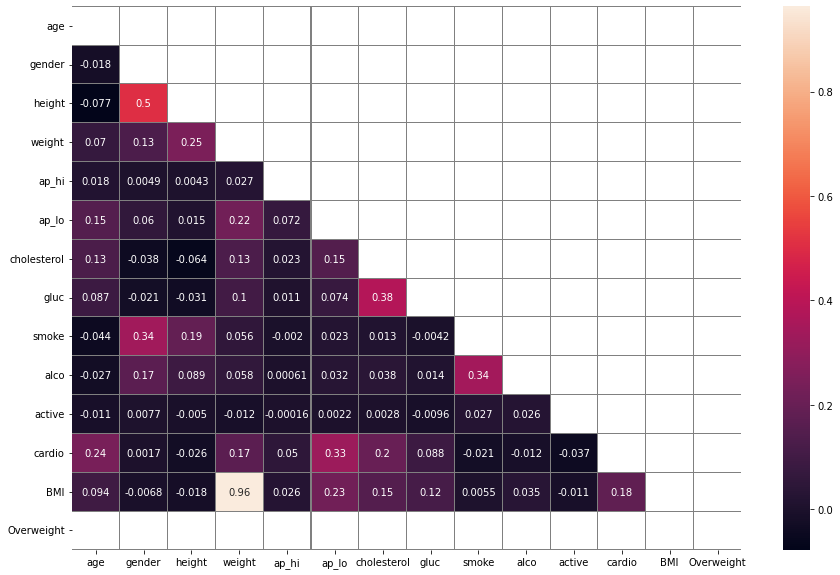

In [ ]:
plt.figure(figsize=(15,10))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sb.heatmap(df.corr(),annot=True,mask=mask,linewidths=0.1, linecolor='gray') 

# white space is because of the bad values